In [2]:
import pandas as pd   # Para manipulación de datos
import numpy as np    # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos más avanzados

In [3]:
from google.colab import files
uploaded = files.upload()  # Seleccionas el archivo desde tu PC

# Cargar el archivo con codificación compatible
df = pd.read_csv("combate_resultados4.csv")

Saving combate_resultados4.csv to combate_resultados4.csv


In [4]:
# ==========================================
# 0. Carga de Datos desde CSV (única base)
# ==========================================

# Convertir fecha si existe la columna correspondiente
for col in df.columns:
    if "fecha" in col.lower():
        df[col] = pd.to_datetime(df[col], errors="ignore")

print("✅ Base de datos cargada correctamente")
print(df.shape)
print(df.head())


✅ Base de datos cargada correctamente
(4429, 25)
      participante       nick                           fotourl      celular  \
0  Javier Salvador  Xmz Charz  https://i.imgur.com/44l6CKP.jpeg  998552043.0   
1    Lucila Najera       Lucy  https://i.imgur.com/djaS15B.jpeg          NaN   
2    Andres Najera     Andres  https://i.imgur.com/DjzIysQ.jpeg          NaN   
3    Lucila Najera       Lucy  https://i.imgur.com/djaS15B.jpeg          NaN   
4  Javier Salvador  Xmz Charz  https://i.imgur.com/44l6CKP.jpeg  998552043.0   

                correo resultado  marcador  idcombate                game  \
0  xmzgcharz@gmail.com      GANO         1          1  ONE MUST FALL 2097   
1                  NaN      GANO         1          2  ONE MUST FALL 2097   
2                  NaN      GANO         1          3  ONE MUST FALL 2097   
3                  NaN      GANO         1          4  ONE MUST FALL 2097   
4  xmzgcharz@gmail.com      GANO         1          5  ONE MUST FALL 2097   

   anio

/tmp/ipython-input-2654357584.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], errors="ignore")
/tmp/ipython-input-2654357584.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], errors="ignore")
/tmp/ipython-input-2654357584.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], errors="ignore")


In [5]:
# Variables dependientes Calculadas

# Contar cuántas veces cada jugador ganó o perdió
resumen = df.groupby(['participante', 'resultado']).size().unstack(fill_value=0)

# TOTAL PARTIDAS
# Agregar el total de partidas
resumen['total_partidas'] = resumen.sum(axis=1)

# TOTAL PARTIDAS GANADAS Y PERDIDAS
# Reordenar las columnas por claridad
resumen = resumen.reindex(columns=['GANO', 'PERDIO', 'total_partidas'], fill_value=0)

# Reordenar las columnas por claridad
resumen = resumen.reindex(columns=['GANO', 'PERDIO', 'total_partidas'], fill_value=0)

# RENDIMIENTO PROMEDIO
# Calcular rendimiento promedio (porcentaje de victorias)
resumen['rendimiento_promedio'] = (resumen['GANO'] / resumen['total_partidas']) * 100

# Redondear a 2 decimales para mayor claridad
resumen['rendimiento_promedio'] = resumen['rendimiento_promedio'].round(2)

# PUNTAJE POR GANANCIA
# Calcular puntaje por ganancia
resumen['puntaje_por_ganancia'] = resumen['GANO'] * 0.7
resumen['puntaje_por_ganancia'] = resumen['puntaje_por_ganancia'].round(3)

# TORNEOS GANADOS X PARTICIPANTE
# --- Contar torneos ganados ---
torneos_ganados = (
    df[(df['resultado'] == 'GANO') & (df['instancia_torneo'].isin(['FJ', 'FG']))]
    .groupby('participante')
    .size()
    .rename('torneos_ganados')
)

# EVENTOS GANADOS X PARTICIPANTE
# --- Contar eventos ganados ---
eventos_ganados = (
    df[(df['resultado'] == 'GANO') & (df['instancia_torneo'].isin(['FT', 'FG']))]
    .groupby('participante')
    .size()
    .rename('eventos_ganados')
)

# --- Unir ambos conteos al resumen ---
resumen = resumen.join([torneos_ganados, eventos_ganados])

# --- Rellenar valores faltantes con 0 ---
resumen[['torneos_ganados', 'eventos_ganados']] = resumen[['torneos_ganados', 'eventos_ganados']].fillna(0).astype(int)

# PUNTAJE RANKING
# --- Calcular el puntaje para ranking ---
resumen['puntaje_ranking'] = (
    (resumen['rendimiento_promedio'] * 0.65) +
    (resumen['puntaje_por_ganancia'] * 0.35) +
    (resumen['torneos_ganados'] * 1) +
    (resumen['eventos_ganados'] * 5)
).round(2)

# --- Mostrar resultado final ---
resumen

,GANO,PERDIO,total_partidas,rendimiento_promedio,puntaje_por_ganancia,torneos_ganados,eventos_ganados,puntaje_ranking
participante,,,,,,,,
Alan Sanchez,0,4,4,0.00,0.0,0,0,0.00
Alberto Cadena,61,101,162,37.65,42.7,4,1,48.42
Alejandro Granda,1,2,3,33.33,0.7,0,0,21.91
Alejandro Matute,1,2,3,33.33,0.7,0,0,21.91
Alejandro Pozo,1,2,3,33.33,0.7,0,0,21.91
...,...,...,...,...,...,...,...,...
Victor Salaz,1,2,3,33.33,0.7,0,0,21.91
William Almachi,1,2,3,33.33,0.7,0,0,21.91
Xavier Calderon,0,4,4,0.00,0.0,0,0,0.00


In [6]:
# Total de partidas por franquicia usando combates únicos
total_partidas_franquicia = (
    df[['franquicia', 'idcombate']]
    .drop_duplicates()        # elimina combates repetidos
    .groupby('franquicia')
    .size()
    .reset_index(name='total_partidas')
)


# Número de participantes únicos por franquicia
participantes_franquicia = (
    df.groupby('franquicia')['participante']
    .nunique()
    .reset_index(name='total_participantes')
)


# Unir total de partidas + total de participantes
resumen_franquicia = total_partidas_franquicia.merge(
    participantes_franquicia, on='franquicia'
)

resumen_franquicia

,franquicia,total_partidas,total_participantes
0,BEAT SABER,10,11
1,BLAZBLUE,22,12
2,BLOODY ROAR,60,19
3,CALL OF DUTY,58,36
4,CATHERINE,42,22
5,CRASH BANDICOOT,22,23
6,DEAD OR ALIVE,49,29
7,DRAGON BALL,255,123
8,DUCK HUNT,13,12
9,FIFA,62,64


In [7]:
# Ejecución de los modelos de predicción y despligue de la predicción del ganador en un torneo de 32 participantes
# Bloque: Construcción del dataset A vs B
import pandas as pd

# --- 1. Unir resumen con atributos de jugadores + fotos ---
jugadores = resumen.copy()

# Agregar la foto desde df
foto_df = df[['participante', 'fotourl']].drop_duplicates().set_index('participante')
jugadores = jugadores.join(foto_df)

jugadores = jugadores.reset_index().rename(columns={'participante':'jugador'})

# --- 2. Crear tabla de combates A vs B ---
combates = df.copy()
combates = combates.sort_values(['idcombate', 'participante'])
combates['pos'] = combates.groupby('idcombate').cumcount()

A = combates[combates['pos']==0].copy().add_prefix('A_')
B = combates[combates['pos']==1].copy().add_prefix('B_')

duelos = pd.merge(A, B, left_on='A_idcombate', right_on='B_idcombate')
duelos['idcombate'] = duelos['A_idcombate']
duelos = duelos.drop(columns=['A_idcombate','B_idcombate'])

# --- 3. Unir atributos avanzados del jugador (incluye fotourl) ---
duelos = duelos.merge(jugadores.add_prefix("A_"), left_on='A_participante', right_on='A_jugador', how='left')
duelos = duelos.merge(jugadores.add_prefix("B_"), left_on='B_participante', right_on='B_jugador', how='left')

# --- 4. Variable objetivo ---
duelos['y'] = (duelos['A_resultado'] == "GANO").astype(int)

# --- 5. Variables delta ---
duelos['delta_ranking'] = duelos['A_puntaje_ranking'] - duelos['B_puntaje_ranking']
duelos['delta_rendimiento'] = duelos['A_rendimiento_promedio'] - duelos['B_rendimiento_promedio']
duelos['delta_total_partidas'] = duelos['A_total_partidas'] - duelos['B_total_partidas']

# --- 6. Head-to-head ---
duelos['head2head'] = 0

# --- 7. Variables del combate ---
duelos['is_final'] = duelos['A_instancia_torneo'].isin(['FJ','FT','FG']).astype(int)
duelos['same_game'] = (duelos['A_game'] == duelos['B_game']).astype(int)
duelos['same_franquicia'] = (duelos['A_franquicia'] == duelos['B_franquicia']).astype(int)

# --- 8. Variables temporales ---
duelos['anio'] = pd.to_datetime(duelos['A_torneo_juego_fecha']).dt.year
duelos['mes'] = pd.to_datetime(duelos['A_torneo_juego_fecha']).dt.month

duelos_final = duelos.copy()

# Dataset final

duelos_final = duelos.copy()

# ==============================
# 7.2 Entrenamiento de Modelos Predictivos
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Selección de variables para modelado
target = 'y'
features = [
    'delta_ranking', 'delta_rendimiento', 'delta_total_partidas',
    'same_game', 'same_franquicia', 'is_final'
]

X = duelos_final[features]
y = duelos_final[target]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------------
# 1) Regresión Logística
# ----------------------------------------------
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logit))

# ----------------------------------------------
# 2) Random Forest (como modelo ML avanzado)
# ----------------------------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# ----------------------------------------------
# 3) Bradley-Terry (BT) — aproximado usando delta_ranking
# ----------------------------------------------
duelos_final['bt_prob'] = 1 / (1 + np.exp(-duelos_final['delta_ranking']))
# No se entrena; BT usa fórmula analítica

# ----------------------------------------------
# 4) Elo Rating System — entrenamiento recursivo
# ----------------------------------------------
elo = {p: 1500 for p in df['participante'].unique()}
K = 24

for _, row in duelos_final.iterrows():
    A = row['A_participante']
    B = row['B_participante']
    scoreA = row['y']
    EA = 1 / (1 + 10 ** ((elo[B] - elo[A]) / 400))
    EB = 1 - EA
    elo[A] += K * (scoreA - EA)
    elo[B] += K * ((1 - scoreA) - EB)

# Elo final guardado en diccionario 'elo'

# ==============================
# 8. Simulación del Torneo 2025 — Top 32
# ==============================

def predecir_A_vs_B(modelo, fila):
    if modelo == 'logit':
        return logit.predict_proba(fila[features])[0][1]
    if modelo == 'rf':
        return rf.predict_proba(fila[features])[0][1]
    if modelo == 'bt':
        return fila['bt_prob'].values[0]
    if modelo == 'elo':
        A = fila['A_participante'].values[0]
        B = fila['B_participante'].values[0]
        EA = 1 / (1 + 10 ** ((elo[B] - elo[A]) / 400))
        return EA

# Selección de top 32
ranking_top32 = resumen.sort_values('puntaje_ranking', ascending=False).head(32)

# Simulación bracket eliminación directa
import random

jugadores = list(ranking_top32.index)
random.shuffle(jugadores)

def simular_ronda(jugadores, modelo='rf'):
    ganadores = []
    for i in range(0, len(jugadores), 2):
        A = jugadores[i]
        B = jugadores[i+1]
        fila = duelos_final.iloc[0:1].copy()
        fila['A_participante'] = A
        fila['B_participante'] = B
        fila['delta_ranking'] = resumen.loc[A,'puntaje_ranking'] - resumen.loc[B,'puntaje_ranking']
        fila['delta_rendimiento'] = resumen.loc[A,'rendimiento_promedio'] - resumen.loc[B,'rendimiento_promedio']
        fila['delta_total_partidas'] = resumen.loc[A,'total_partidas'] - resumen.loc[B,'total_partidas']
        fila['same_game'] = 0
        fila['same_franquicia'] = 0
        fila['is_final'] = 0
        probA = predecir_A_vs_B(modelo, fila)
        ganadores.append(A if probA >= 0.5 else B)
    return ganadores

# Torneo completo
r16 = simular_ronda(jugadores)
r8 = simular_ronda(r16)
r4 = simular_ronda(r8)
r2 = simular_ronda(r4)
campeon = simular_ronda(r2)[0]

print("Los 32 participantes seleccionados:\n")
for i, jugador in enumerate(jugadores, start=1):
    print(f"{i}. {jugador}")

print("CAMPEÓN PREDICTIVO 2025 (modelo RF):", campeon)

import pandas as pd
from IPython.display import Image, display


# filtra el registro de campeon
registro = df[df["participante"] == campeon].iloc[0]

# Extraer URL del campo fotourl
url_foto = registro["fotourl"]
print("Foto URL:", url_foto)

# Mostrar la imagen en el notebook
display(Image(url=url_foto,width=150))


Logistic Regression Accuracy: 0.6867469879518072
Random Forest Accuracy: 0.6216867469879518
Los 32 participantes seleccionados:

1. Bryan Suarez
2. Victor Guacho
3. Guillermo Pazos
4. Luis Paz
5. Gianni Torres
6. Luis Cuadrado
7. David Cabascango
8. Jhonathan Llumiquinga
9. Mateo Guevara
10. Lucila Najera
11. Javier Salvador
12. Edison Javier Muñoz
13. Marco Cardona
14. David Pinargote
15. Alberto Cadena
16. Israel Jimenez
17. Alvaro Perez
18. Andres Najera
19. Sebastian Cadena
20. Jaime Montalvo
21. Gustavo Egas
22. Juan Carlos Farinango
23. Carlos Vasquez
24. Rodrigo Mena
25. Diego Estevez
26. Kevin Mosquera
27. Jose Guerrero
28. José Pacheco
29. Bryan Cobo
30. Erick Carcelen
31. Francisco Pazos
32. Maite Guevara
CAMPEÓN PREDICTIVO 2025 (modelo RF): Edison Javier Muñoz
Foto URL: https://i.imgur.com/LqP822Y.jpeg




 MÉTRICAS: Regresión Logística
Accuracy: 0.6867469879518072
Precision: 0.700507614213198
Recall: 0.6602870813397129
F1 Score: 0.6798029556650246
ROC AUC: 0.7659799321781948
Log-Loss: 0.5763215421274359
Brier Score: 0.19700598128640234

Matriz de Confusión:
[[147  59]
 [ 71 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       206
           1       0.70      0.66      0.68       209

    accuracy                           0.69       415
   macro avg       0.69      0.69      0.69       415
weighted avg       0.69      0.69      0.69       415



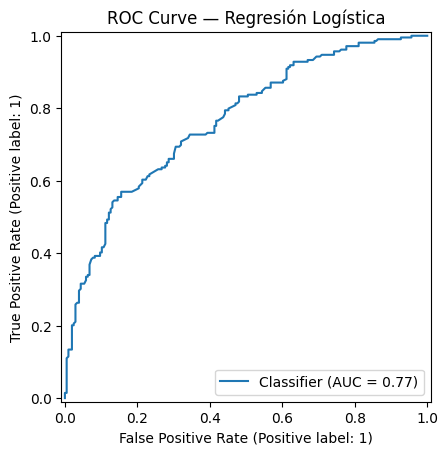



 MÉTRICAS: Random Forest
Accuracy: 0.6216867469879518
Precision: 0.6226415094339622
Recall: 0.631578947368421
F1 Score: 0.6270783847980997
ROC AUC: 0.6697170994564965
Log-Loss: 0.8678223406864853
Brier Score: 0.25291241331236125

Matriz de Confusión:
[[126  80]
 [ 77 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       206
           1       0.62      0.63      0.63       209

    accuracy                           0.62       415
   macro avg       0.62      0.62      0.62       415
weighted avg       0.62      0.62      0.62       415



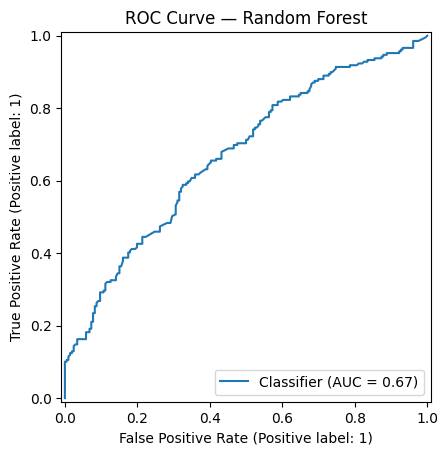



 MÉTRICAS: Bradley–Terry
Accuracy: 0.6674698795180722
Precision: 0.6698564593301436
Recall: 0.6698564593301436
F1 Score: 0.6698564593301436
ROC AUC: 0.7001207785571608
Log-Loss: 6.4808875384250655
Brier Score: 0.32331555352161734

Matriz de Confusión:
[[137  69]
 [ 69 140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       206
           1       0.67      0.67      0.67       209

    accuracy                           0.67       415
   macro avg       0.67      0.67      0.67       415
weighted avg       0.67      0.67      0.67       415



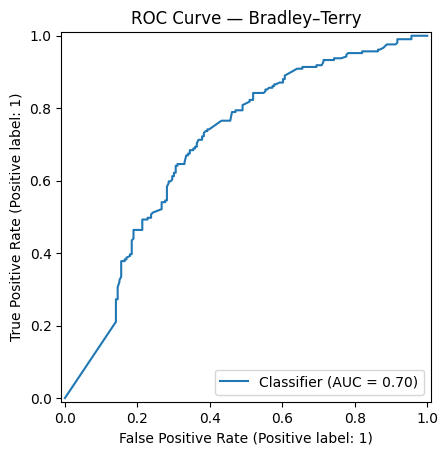



 MÉTRICAS: Elo Rating System
Accuracy: 0.6795180722891566
Precision: 0.677570093457944
Recall: 0.69377990430622
F1 Score: 0.6855791962174941
ROC AUC: 0.7317670831978446
Log-Loss: 0.6182350218531139
Brier Score: 0.21388233372316956

Matriz de Confusión:
[[137  69]
 [ 64 145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       206
           1       0.68      0.69      0.69       209

    accuracy                           0.68       415
   macro avg       0.68      0.68      0.68       415
weighted avg       0.68      0.68      0.68       415



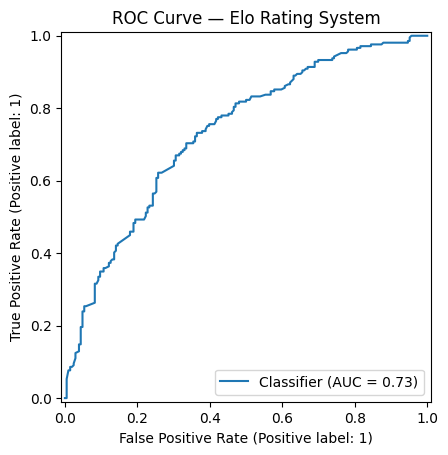



 MÉTRICAS: XGBoost
Accuracy: 0.6457831325301204
Precision: 0.6581632653061225
Recall: 0.6172248803827751
F1 Score: 0.6370370370370371
ROC AUC: 0.7126283272169832
Log-Loss: 0.6373695586657044
Brier Score: 0.21954728332616413

Matriz de Confusión:
[[139  67]
 [ 80 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       206
           1       0.66      0.62      0.64       209

    accuracy                           0.65       415
   macro avg       0.65      0.65      0.65       415
weighted avg       0.65      0.65      0.65       415



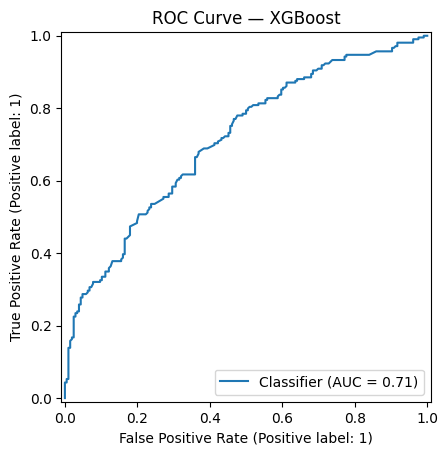

[LightGBM] [Info] Number of positive: 819, number of negative: 840
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1659, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493671 -> initscore=-0.025318
[LightGBM] [Info] Start training from score -0.025318


 MÉTRICAS: LightGBM
Accuracy: 0.6240963855421687
Precision: 0.6280193236714976
Recall: 0.6220095693779905
F1 Score: 0.625
ROC AUC: 0.6931411715520045
Log-Loss: 0.7055095191212594
Brier Score: 0.23706834869046178

Matriz de Confusión:
[[129  77]
 [ 79 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       206
           1       0.63      0.62      0.62       209

  

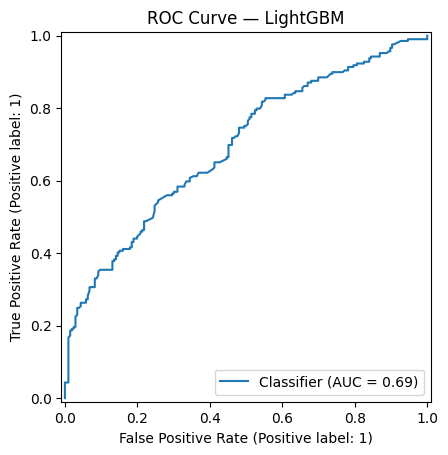

In [8]:
# MOSTRAR LAS METRICAS DE LOS 4 MODELOS
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, log_loss, brier_score_loss,
    RocCurveDisplay
)
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# FUNCIÓN GENERAL PARA MOSTRAR MÉTRICAS
# ==========================================

def mostrar_metricas(y_true, y_pred, y_prob, nombre_modelo):
    print(f"\n\n============================")
    print(f" MÉTRICAS: {nombre_modelo}")
    print(f"============================")

    # --- Métricas principales ---
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

    # --- AUC, LogLoss, Brier ---
    if y_prob is not None:
        print("ROC AUC:", roc_auc_score(y_true, y_prob))
        print("Log-Loss:", log_loss(y_true, y_prob))
        print("Brier Score:", brier_score_loss(y_true, y_prob))

    # --- Matriz de confusión ---
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))

    # --- Reporte completo ---
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # --- Curva ROC ---
    if y_prob is not None:
        RocCurveDisplay.from_predictions(y_true, y_prob)
        plt.title(f"ROC Curve — {nombre_modelo}")
        plt.show()


# ==========================================
# 1) REGRESIÓN LOGÍSTICA
# ==========================================

y_prob_logit = logit.predict_proba(X_test)[:, 1]
y_pred_logit = logit.predict(X_test)

mostrar_metricas(y_test, y_pred_logit, y_prob_logit, "Regresión Logística")


# ==========================================
# 2) RANDOM FOREST
# ==========================================

y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

mostrar_metricas(y_test, y_pred_rf, y_prob_rf, "Random Forest")


# ==========================================
# 3) BRADLEY–TERRY
# Usamos la fórmula analítica: P(A gana) = 1 / (1 + exp(-delta_ranking))
# ==========================================

y_prob_bt = 1 / (1 + np.exp(-X_test['delta_ranking']))
y_pred_bt = (y_prob_bt >= 0.5).astype(int)

mostrar_metricas(y_test, y_pred_bt, y_prob_bt, "Bradley–Terry")


# ==========================================
# 4) SISTEMA ELO
# Para test: prob estimada = EA = 1 / (1 + 10^((RB - RA)/400))
# ==========================================

y_prob_elo = []

for idx, row in X_test.iterrows():
    A = duelos_final.loc[idx, "A_participante"]
    B = duelos_final.loc[idx, "B_participante"]
    EA = 1 / (1 + 10 ** ((elo[B] - elo[A]) / 400))
    y_prob_elo.append(EA)

y_prob_elo = np.array(y_prob_elo)
y_pred_elo = (y_prob_elo >= 0.5).astype(int)

mostrar_metricas(y_test, y_pred_elo, y_prob_elo, "Elo Rating System")


# ==========================================
# 5) XGBOOST (si está instalado)
# ==========================================

try:
    from xgboost import XGBClassifier

    xgb = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric='logloss'
    )
    xgb.fit(X_train, y_train)

    y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
    y_pred_xgb = xgb.predict(X_test)

    mostrar_metricas(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

except Exception as e:
    print("\n❌ XGBoost no está instalado o dio error, se omite.")
    print(e)


# ==========================================
# 6) LIGHTGBM (si está instalado)
# ==========================================

try:
    import lightgbm as lgb

    lgbm = lgb.LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31
    )
    lgbm.fit(X_train, y_train)

    y_prob_lgb = lgbm.predict_proba(X_test)[:, 1]
    y_pred_lgb = lgbm.predict(X_test)

    mostrar_metricas(y_test, y_pred_lgb, y_prob_lgb, "LightGBM")

except Exception as e:
    print("\n❌ LightGBM no está instalado o dio error, se omite.")
    print(e)


In [9]:
# Ejecución de los modelos de predicción y despligue de la predicción de los ganadores en un torneo de 8 participantes y 6 franquicias de juegos
# Simulación y modelación de enfrentamientos top 8 y 6 franquicias mas jugadas
# ---------------------------
# Notebook/Script completo
# ---------------------------
# Pegar esto en una celda de Google Colab y ejecutar.
# --------------------------------
import pandas as pd
import numpy as np
import math, os, random
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
import warnings
warnings.filterwarnings("ignore")

# Optional: try XGBoost for ML model, fallback to RandomForest
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except Exception:
    XGBOOST_AVAILABLE = False

# ---------------------------
# 0) Config
# ---------------------------
DATA_FP = Path("/mnt/data/combate_resultados4.csv")
OUT_DIR = Path("/mnt/data/brackets_franchises")
OUT_DIR.mkdir(exist_ok=True, parents=True)
SIMULATIONS = 3000  # Monte-Carlo sims per franchise
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

df.columns = df.columns.str.strip()

# detectar idcombate column
id_candidates = [c for c in df.columns if c.lower() in ("idcombate","id_combate","id_combat","id") ]
idcol = id_candidates[0] if id_candidates else None
if idcol is None:
    raise KeyError("No se encontró una columna que represente Idcombate. Nombre esperado: 'Idcombate' o similar.")

# asegurarnos fechas como datetime si existen
for col in ['torneo_juego_fecha','fecha_torneo_inicio','fecha_torneo_fin']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# ---------------------------
# 2) Calcular ranking_franquicia si no existe en df
#    (USANDO SOLO rendimiento dentro de la franquicia, sin eventos_ganados)
# ---------------------------
if 'ranking_franquicia' not in df.columns:
    # Group by franquicia + participante
    grp = df.groupby(['franquicia','participante'])
    partidas_ganadas = grp.apply(lambda g: (g['resultado']=='GANO').sum()).rename('partidas_ganadas')
    total_partidas = grp.size().rename('total_partidas')
    rendimiento_fr = (partidas_ganadas / total_partidas.replace(0, np.nan) * 100).fillna(0).rename('rendimiento_promedio_fr')
    # torneos ganados (FJ, FG)
    if 'instancia_torneo' in df.columns:
        torneos_fr = df[(df['resultado']=='GANO') & (df['instancia_torneo'].isin(['FJ','FG']))].groupby(['franquicia','participante']).size().rename('torneos_ganados_fr')
        torneos_fr = torneos_fr.reindex(partidas_ganadas.index).fillna(0)
    else:
        torneos_fr = pd.Series(0, index=partidas_ganadas.index, name='torneos_ganados_fr')
    # ranking_franquicia según requeriste (sin eventos_ganados)
    ranking_fr = (rendimiento_fr * 0.7) + (partidas_ganadas * 0.3) + (torneos_fr * 2.5)
    ranking_fr = ranking_fr.rename('ranking_franquicia').reset_index()
    df = df.merge(ranking_fr, on=['franquicia','participante'], how='left')
    df['ranking_franquicia'] = df['ranking_franquicia'].fillna(0)

# ---------------------------
# 3) Generar resumen por participante (si no existe)
# ---------------------------
# resumen: por participante, variables agregadas (globales)
if Path("/mnt/data/resumen_por_participante.csv").exists():
    resumen = pd.read_csv("/mnt/data/resumen_por_participante.csv", index_col=0)
else:
    resumen = df.groupby('participante')['resultado'].value_counts().unstack(fill_value=0)
    for c in ['GANO','PERDIO','EMPATE']:
        if c not in resumen.columns:
            resumen[c] = 0
    resumen['total_partidas'] = resumen[['GANO','PERDIO','EMPATE']].sum(axis=1)
    resumen['rendimiento_promedio'] = (resumen['GANO'] / resumen['total_partidas']).fillna(0)*100
    resumen['puntaje_por_ganancia'] = (resumen['GANO'] * 0.7).round(3)
    # torneos/eventos (global)
    if 'instancia_torneo' in df.columns:
        torneos = df[(df['resultado']=='GANO') & (df['instancia_torneo'].isin(['FJ','FG']))].groupby('participante').size().rename('torneos_ganados')
        eventos = df[(df['resultado']=='GANO') & (df['instancia_torneo'].isin(['FT','FG']))].groupby('participante').size().rename('eventos_ganados')
    else:
        torneos = pd.Series(0, name='torneos_ganados')
        eventos = pd.Series(0, name='eventos_ganados')
    resumen = resumen.join(torneos, how='left').join(eventos, how='left').fillna(0)
    resumen['puntaje_ranking'] = (
        (resumen['rendimiento_promedio']*0.7) +
        (resumen['puntaje_por_ganancia']*0.3) +
        (resumen['torneos_ganados']*1) +
        (resumen['eventos_ganados']*5)
    ).round(2)
    resumen.to_csv("/mnt/data/resumen_por_participante.csv")

# Añadir fotourl a resumen si existe en df
if 'fotourl' in df.columns:
    foto_df = df[['participante','fotourl']].drop_duplicates().set_index('participante')
    resumen = resumen.join(foto_df, how='left')

# ---------------------------
# 4) Construir dataset A vs B (duelos) usando idcombate
# ---------------------------
# asumimos que por cada idcombate hay exactamente 2 registros (si hay más, se ignoran)
comb = df.copy().sort_values([idcol,'participante'])
comb['pos'] = comb.groupby(idcol).cumcount()
A = comb[comb['pos']==0].copy().add_prefix('A_')
B = comb[comb['pos']==1].copy().add_prefix('B_')
duelos = pd.merge(A, B, left_on=f"A_{idcol}", right_on=f"B_{idcol}", how='inner')
duelos['idcombate'] = duelos[f"A_{idcol}"]
# merge atributos resumen (para A y B) for features as fallback
jugadores_df = resumen.reset_index().rename(columns={'index':'participante'})
duelos = duelos.merge(jugadores_df.add_prefix('A_'), left_on='A_participante', right_on='A_participante', how='left')
duelos = duelos.merge(jugadores_df.add_prefix('B_'), left_on='B_participante', right_on='B_participante', how='left')

# target
duelos['y'] = (duelos['A_resultado'] == 'GANO').astype(int)

# features delta
duelos['delta_ranking'] = duelos['A_puntaje_ranking'] - duelos['B_puntaje_ranking']
duelos['delta_rendimiento'] = duelos['A_rendimiento_promedio'] - duelos['B_rendimiento_promedio']
duelos['delta_total_partidas'] = duelos['A_total_partidas'] - duelos['B_total_partidas']

# head2head (wins_A_vs_B - wins_B_vs_A) : construimos tabla de enfrentamientos historicamente
# We'll compute for all pairs present in duelos
def compute_head2head(df_main, idcol):
    # dict (i,j)->wins_i_vs_j
    wins = defaultdict(int)
    counts = defaultdict(int)
    g = df_main.groupby(idcol)
    for _, grp in g:
        players = list(grp['participante'])
        results = list(grp['resultado'])
        for i,pA in enumerate(players):
            for j,pB in enumerate(players):
                if i==j: continue
                counts[(pA,pB)] += 1
                if results[i] == 'GANO':
                    wins[(pA,pB)] += 1
    return wins, counts

wins_counts, match_counts = compute_head2head(df, idcol)

def head2head_diff(a,b):
    return wins_counts.get((a,b),0) - wins_counts.get((b,a),0)

duelos['head2head'] = duelos.apply(lambda r: head2head_diff(r['A_participante'], r['B_participante']), axis=1)

# combate features
duelos['is_final'] = duelos['A_instancia_torneo'].isin(['FJ','FT','FG']).astype(int)
duelos['same_game'] = (duelos['A_game'] == duelos['B_game']).astype(int)
duelos['same_franquicia'] = (duelos['A_franquicia'] == duelos['B_franquicia']).astype(int)

# temporal
if 'A_torneo_juego_fecha' in duelos.columns:
    duelos['anio'] = pd.to_datetime(duelos['A_torneo_juego_fecha'], errors='coerce').dt.year
    duelos['mes'] = pd.to_datetime(duelos['A_torneo_juego_fecha'], errors='coerce').dt.month
else:
    duelos['anio'] = np.nan; duelos['mes'] = np.nan

# select model features
model_features = ['delta_ranking','delta_rendimiento','delta_total_partidas','head2head','same_game','same_franquicia','is_final']

# ---------------------------
# 5) Entrenar modelos (Logistic y ML) sobre el dataset de duelos
# ---------------------------
X = duelos[model_features].fillna(0)
y = duelos['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED, stratify=y)

# Logistic
logit = LogisticRegression(max_iter=2000)
logit.fit(X_train, y_train)
proba_logit = logit.predict_proba(X_test)[:,1]
print("Logit AUC:", roc_auc_score(y_test, proba_logit))

# ML model: prefer XGBoost, else RandomForest
if XGBOOST_AVAILABLE:
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    params = {"objective":"binary:logistic", "eval_metric":"auc", "seed":SEED, "verbosity":0}
    model_xgb = xgb.train(params, dtrain, num_boost_round=200)
    proba_ml = model_xgb.predict(dtest)
    print("XGBoost AUC:", roc_auc_score(y_test, proba_ml))
    def ml_predict_proba(df_row):
        return model_xgb.predict(xgb.DMatrix(df_row[model_features].fillna(0)))[0]
else:
    rf = RandomForestClassifier(n_estimators=400, random_state=SEED)
    rf.fit(X_train, y_train)
    proba_ml = rf.predict_proba(X_test)[:,1]
    print("RandomForest AUC:", roc_auc_score(y_test, proba_ml))
    def ml_predict_proba(df_row):
        return rf.predict_proba(df_row[model_features].fillna(0))[0,1]

# ---------------------------
# 6) Estimar Bradley–Terry (fuerzas) para todos los jugadores
#    usando MM algorithm sobre matriz de enfrentamientos (global)
# ---------------------------
# Build players list from resumen
players_all = list(resumen.index.astype(str))
player_idx = {p:i for i,p in enumerate(players_all)}
n = len(players_all)
# compute aggregated pairwise counts m_ij and wins w_ij
m = np.zeros((n,n), dtype=float)
w = np.zeros((n,n), dtype=float)

grp = df.groupby(idcol)
for _, g in grp:
    participants = list(g['participante'])
    results = list(g['resultado'])
    for i,pA in enumerate(participants):
        for j,pB in enumerate(participants):
            if i==j: continue
            if pA not in player_idx or pB not in player_idx: continue
            ii = player_idx[pA]; jj = player_idx[pB]
            m[ii,jj] += 1
            if results[i] == 'GANO':
                w[ii,jj] += 1

# MM algorithm
def bt_mm_players(players, m, w, max_iter=2000, tol=1e-8):
    n = len(players)
    s = np.ones(n)
    for it in range(max_iter):
        s_old = s.copy()
        denom = np.zeros(n)
        for i in range(n):
            for j in range(n):
                if i==j: continue
                m_ij = m[i,j] + m[j,i]
                if m_ij>0:
                    denom[i] += m_ij / (s[i] + s[j])
        wins = w.sum(axis=1)
        with np.errstate(divide='ignore', invalid='ignore'):
            s = np.where(denom>0, wins/denom, s)
        # normalize
        s = s / (np.exp(np.mean(np.log(s + 1e-12))))
        if np.max(np.abs(s - s_old)) < tol:
            break
    return {players[i]: float(s[i]) for i in range(n)}

bt_strengths = bt_mm_players(players_all, m, w)

# ---------------------------
# 7) Calcular Elo final (cronológico)
# ---------------------------
# inicial ratings
elo = {p:1500.0 for p in players_all}
K = 24.0
# sort duels chronologically by date if available, else by index order
if 'torneo_juego_fecha' in df.columns:
    df_sorted = df.sort_values('torneo_juego_fecha')
else:
    df_sorted = df.copy()

# iterate over combats: for each idcombate, find pairs and update ELO
for _, grp in df_sorted.groupby(idcol):
    if grp.shape[0] < 2: continue
    players = list(grp['participante'])
    results = list(grp['resultado'])
    # assume pairs: iterate over 2-player structure (if more, update pairwise)
    for i,pA in enumerate(players):
        for j,pB in enumerate(players):
            if i==j: continue
            if pA not in elo or pB not in elo: continue
            RA = elo[pA]; RB = elo[pB]
            EA = 1.0 / (1.0 + 10**((RB-RA)/400.0))
            SA = 1.0 if results[i]=='GANO' else 0.0
            elo[pA] = RA + K*(SA - EA)
            # note: will update multiple times if match has >2 rows, acceptable

# ---------------------------
# 8) Funciones para probabilidad por enfrentamiento (ensamble)
# ---------------------------
def prob_bt(a,b):
    sa = bt_strengths.get(a, 0.0)
    sb = bt_strengths.get(b, 0.0)
    # stable logistic
    diff = sa - sb
    return 1.0 / (1.0 + math.exp(-diff)) if abs(diff)<700 else (1.0 if diff>0 else 0.0)

def prob_elo(a,b):
    RA = elo.get(a,1500.0); RB = elo.get(b,1500.0)
    return 1.0 / (1.0 + 10**((RB-RA)/400.0))

def prob_logit(a,b):
    # construct one-row dataframe
    row = {}
    row['delta_ranking'] = resumen.loc[a,'puntaje_ranking'] - resumen.loc[b,'puntaje_ranking']
    row['delta_rendimiento'] = resumen.loc[a,'rendimiento_promedio'] - resumen.loc[b,'rendimiento_promedio']
    row['delta_total_partidas'] = resumen.loc[a,'total_partidas'] - resumen.loc[b,'total_partidas']
    row['head2head'] = head2head_diff(a,b)
    row['same_game'] = 1 if ( (df[(df['participante']==a)]['game'].iloc[0] if 'game' in df.columns else None) == (df[(df['participante']==b)]['game'].iloc[0] if 'game' in df.columns else None) ) else 0
    row['same_franquicia'] = 1 if ( (df[(df['participante']==a)]['franquicia'].iloc[0] if 'franquicia' in df.columns else None) == (df[(df['participante']==b)]['franquicia'].iloc[0] if 'franquicia' in df.columns else None) ) else 0
    row['is_final'] = 0
    Xrow = pd.DataFrame([row])[model_features].fillna(0)
    return logit.predict_proba(Xrow)[0,1]

def prob_ml(a,b):
    row = {}
    row['delta_ranking'] = resumen.loc[a,'puntaje_ranking'] - resumen.loc[b,'puntaje_ranking']
    row['delta_rendimiento'] = resumen.loc[a,'rendimiento_promedio'] - resumen.loc[b,'rendimiento_promedio']
    row['delta_total_partidas'] = resumen.loc[a,'total_partidas'] - resumen.loc[b,'total_partidas']
    row['head2head'] = head2head_diff(a,b)
    row['same_game'] = 0
    row['same_franquicia'] = 1 if ( (df[(df['participante']==a)]['franquicia'].iloc[0] if 'franquicia' in df.columns else None) == (df[(df['participante']==b)]['franquicia'].iloc[0] if 'franquicia' in df.columns else None) ) else 0
    row['is_final'] = 0
    Xrow = pd.DataFrame([row])[model_features].fillna(0)
    if XGBOOST_AVAILABLE:
        return float(model_xgb.predict(xgb.DMatrix(Xrow))[0])
    else:
        return float(rf.predict_proba(Xrow)[0,1])

# Ensemble weights (adjustable)
w_logit, w_bt, w_elo, w_ml = 0.25, 0.25, 0.25, 0.25

def prob_ensemble(a,b):
    p1 = prob_logit(a,b)
    p2 = prob_bt(a,b)
    p3 = prob_elo(a,b)
    p4 = prob_ml(a,b)
    return w_logit*p1 + w_bt*p2 + w_elo*p3 + w_ml*p4

# ---------------------------
# 9) Identificar 6 franquicias con más participantes y extraer Top-8 por ranking_franquicia
# ---------------------------
fran_counts = df.groupby('franquicia')['participante'].nunique().sort_values(ascending=False)
top6_fran = fran_counts.head(6).index.tolist()
print("Top6 franquicias:", top6_fran)

# For results storage
all_franchise_results = {}

# helper: simulate single elimination bracket with given players and probability function
def simulate_bracket_once(players_list, prob_func):
    # random bracket each simulation per your choice
    pl = players_list.copy()
    random.shuffle(pl)
    while len(pl) > 1:
        next_round = []
        for i in range(0, len(pl), 2):
            A, B = pl[i], pl[i+1]
            pA = prob_func(A,B)
            winner = A if random.random() < pA else B
            next_round.append(winner)
        pl = next_round
    return pl[0]

def simulate_bracket_probs(players_list, prob_func, n_sim=SIMULATIONS):
    wins = {p:0 for p in players_list}
    for _ in range(n_sim):
        champ = simulate_bracket_once(players_list, prob_func)
        wins[champ] += 1
    for k in wins:
        wins[k] /= n_sim
    return wins

# Run per franchise
for fr in top6_fran:
    print(f"\nProcesando franquicia: {fr}")
    # players in franchise
    players_in_fr = df[df['franquicia']==fr]['participante'].unique().tolist()
    # compute ranking_franquicia per participant (we stored earlier in df)
    players_with_rank = [ (p, df[(df['franquicia']==fr)&(df['participante']==p) ]['ranking_franquicia'].max()) for p in players_in_fr ]
    players_with_rank_sorted = sorted(players_with_rank, key=lambda x: x[1], reverse=True)
    top8 = [p for p,_ in players_with_rank_sorted[:8]]
    print("Top8:", top8)
    # Attempt to estimate BT strengths restricted to these players from global m,w
    # Build small matrix for them
    players_small = top8
    idx_small = {p:i for i,p in enumerate(players_small)}
    m_small = np.zeros((8,8))
    w_small = np.zeros((8,8))
    # Fill from global counts
    for i,a in enumerate(players_small):
        for j,b in enumerate(players_small):
            if a==b: continue
            m_small[i,j] = match_counts.get((a,b),0) + match_counts.get((b,a),0)  # total meetings
            w_small[i,j] = wins_counts.get((a,b),0)
    # if no head-to-head, fallback to ranking_franquicia to set strengths
    use_strengths = {}
    if m_small.sum() == 0 and w_small.sum() == 0:
        vals = np.array([ max(1e-3, df[(df['franquicia']==fr)&(df['participante']==p)]['ranking_franquicia'].max()) for p in players_small ])
        # map to log strengths
        for i,p in enumerate(players_small):
            use_strengths[p] = math.log(vals[i])
    else:
        # run BT MM on these 8
        def bt_mm_local(players_list, mmat, wmat, max_iter=2000, tol=1e-8):
            nloc = len(players_list)
            s = np.ones(nloc)
            for it in range(max_iter):
                s_old = s.copy()
                denom = np.zeros(nloc)
                for i in range(nloc):
                    for j in range(nloc):
                        if i==j: continue
                        m_ij = mmat[i,j] + mmat[j,i]
                        if m_ij>0:
                            denom[i] += m_ij/(s[i]+s[j])
                wins_l = wmat.sum(axis=1)
                with np.errstate(divide='ignore', invalid='ignore'):
                    s = np.where(denom>0, wins_l/denom, s)
                s = s / (np.exp(np.mean(np.log(s + 1e-12))))
                if np.max(np.abs(s - s_old)) < tol:
                    break
            return {players_list[i]: float(s[i]) for i in range(nloc)}
        use_strengths = bt_mm_local(players_small, m_small, w_small)
    # Simulate probabilities using ensemble prob_ensemble
    champ_probs = simulate_bracket_probs(players_small, prob_ensemble, n_sim=SIMULATIONS)
    all_franchise_results[fr] = {'top8': players_small, 'champion_probs': champ_probs, 'bt_strengths': use_strengths}
    # save bracket image (single draw) with probs annotated
    bracket_draw = players_small.copy()
    random.Random(SEED).shuffle(bracket_draw)
    rounds_vis = [bracket_draw]
    match_probs_vis = []
    cur = bracket_draw.copy()
    while len(cur)>1:
        next_r=[]; probs_r=[]
        for i in range(0,len(cur),2):
            A,B = cur[i], cur[i+1]
            pA = prob_ensemble(A,B)
            probs_r.append((A,B,pA))
            winner = A if random.random() < pA else B
            next_r.append(winner)
        match_probs_vis.append(probs_r)
        rounds_vis.append(next_r)
        cur = next_r
    # plot bracket
    fig, ax = plt.subplots(figsize=(9,6))
    ax.axis('off')
    def y_pos(k): return [ (i+0.5)*(8/k) for i in range(k) ]
    for r_idx, rp in enumerate(rounds_vis[:-1]):
        ys = y_pos(len(rp)); x = r_idx
        for i,pl in enumerate(rp):
            ax.text(x, ys[i], pl, ha='left', va='center', fontsize=9)
        next_ys = y_pos(len(rounds_vis[r_idx+1]))
        for m_i in range(0,len(rp),2):
            y1=ys[m_i]; y2=ys[m_i+1]; ny=next_ys[m_i//2]
            ax.plot([x+0.25,x+0.8],[y1,ny], linewidth=0.8); ax.plot([x+0.25,x+0.8],[y2,ny], linewidth=0.8)
            A,B,pA = match_probs_vis[r_idx][m_i//2]
            ax.text(x+0.9, (y1+y2)/2, f"{pA:.2f}", fontsize=8)
    ax.text(len(rounds_vis)-1, 4, f"Sample Winner: {rounds_vis[-1][0]}", ha='center', va='center', fontsize=10, fontweight='bold')
    out_path = OUT_DIR / f"bracket_{str(fr).replace('/','_').replace(' ','_')}.png"
    fig.savefig(out_path, dpi=150, bbox_inches='tight')
    plt.close(fig)
    print("Bracket guardado:", out_path)

# ---------------------------
# 10) Guardar resultados - CSV
# ---------------------------
# For each franchise, save champion probabilities
rows = []
for fr,info in all_franchise_results.items():
    for p,prob in info['champion_probs'].items():
        rows.append({'franquicia':fr,'player':p,'prob_champion':prob})
df_probs = pd.DataFrame(rows)
df_probs.to_csv("/mnt/data/franchise_champion_probs.csv", index=False)
print("\nArchivo guardado: /mnt/data/franchise_champion_probs.csv")
print("Brackets guardados en:", OUT_DIR)


Logit AUC: 0.7900427370279184
XGBoost AUC: 0.8058600826868584
Top6 franquicias: ['DRAGON BALL', 'TEKKEN', 'MORTAL KOMBAT', 'FIFA', 'NARUTO', 'MARIO KART']

Procesando franquicia: DRAGON BALL
Top8: ['Bryan Suarez', 'Gianni Torres', 'Israel Jimenez', 'David Cabascango', 'Edison Javier Muñoz', 'Kevin Pazmiño', 'Jose Guerrero', 'Andres Najera']
Bracket guardado: /mnt/data/brackets_franchises/bracket_DRAGON_BALL.png

Procesando franquicia: TEKKEN
Top8: ['Carlos Vasquez', 'Israel Jimenez', 'José Revelo', 'Guillermo Pazos', 'Gianni Torres', 'Bryan Cobo', 'Andres Najera', 'Byron Cocanquilla']
Bracket guardado: /mnt/data/brackets_franchises/bracket_TEKKEN.png

Procesando franquicia: MORTAL KOMBAT
Top8: ['Luis Cuadrado', 'Luis Paz', 'David Pinargote', 'Guillermo Pazos', 'Alvaro Perez', 'Javier Salvador', 'Freddy Quishpe', 'Edison']
Bracket guardado: /mnt/data/brackets_franchises/bracket_MORTAL_KOMBAT.png

Procesando franquicia: FIFA
Top8: ['Francisco Pazos', 'Javier Onofre', 'Jhonathan Llumiquin

Foto URL: https://i.imgur.com/JWgydGS.jpeg


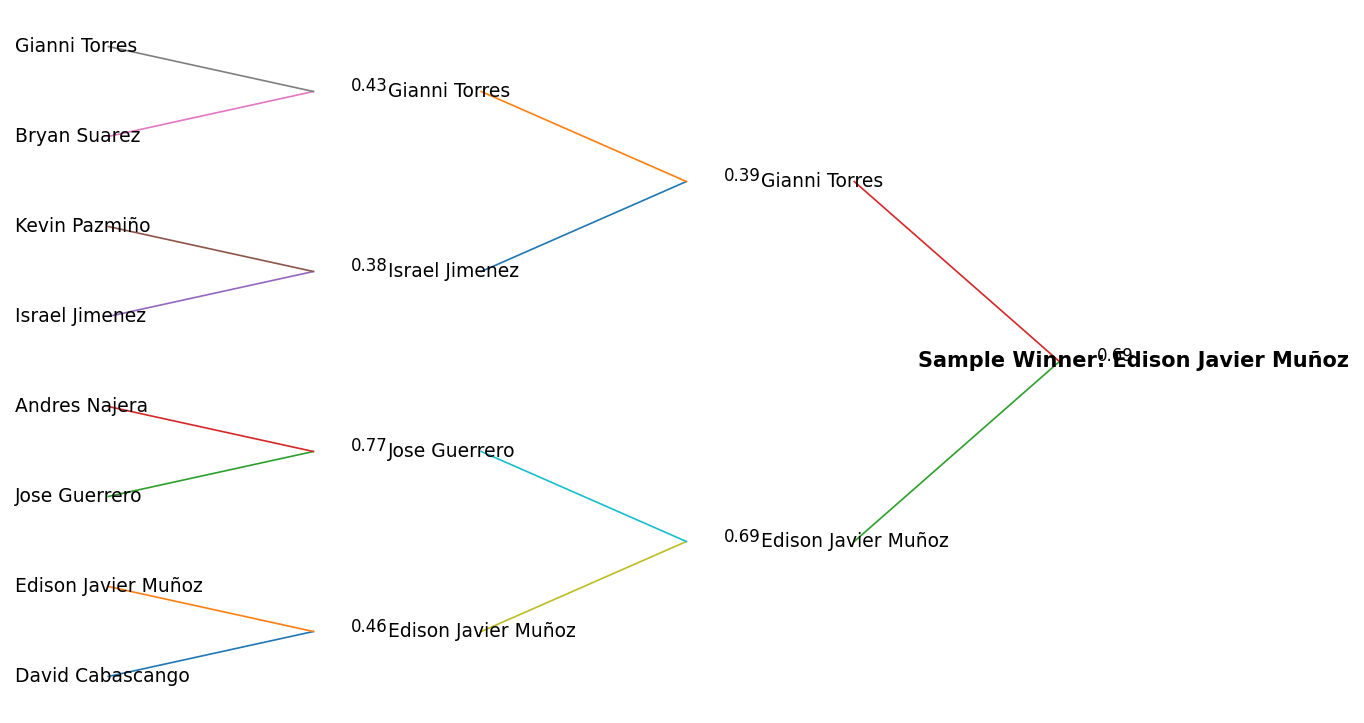

Foto URL: https://i.imgur.com/rHloZR2.jpeg


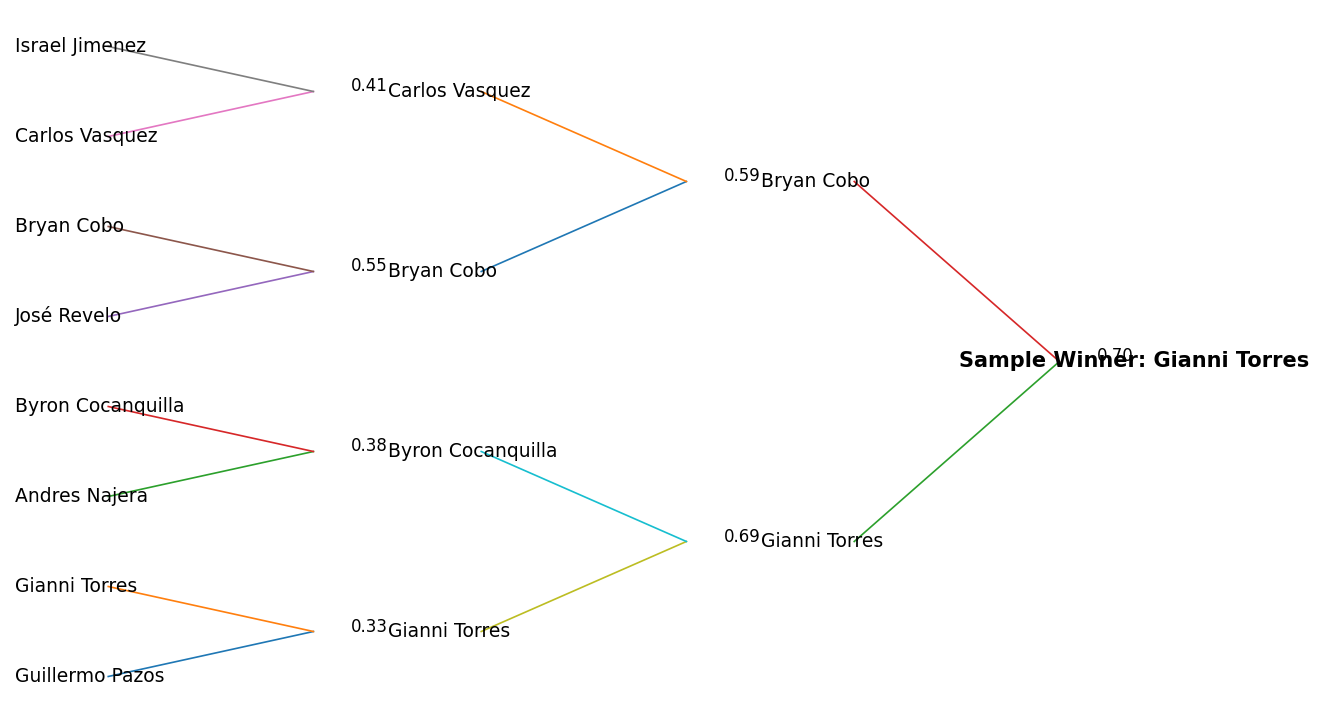

Foto URL: https://i.imgur.com/N3rxUxb.jpeg


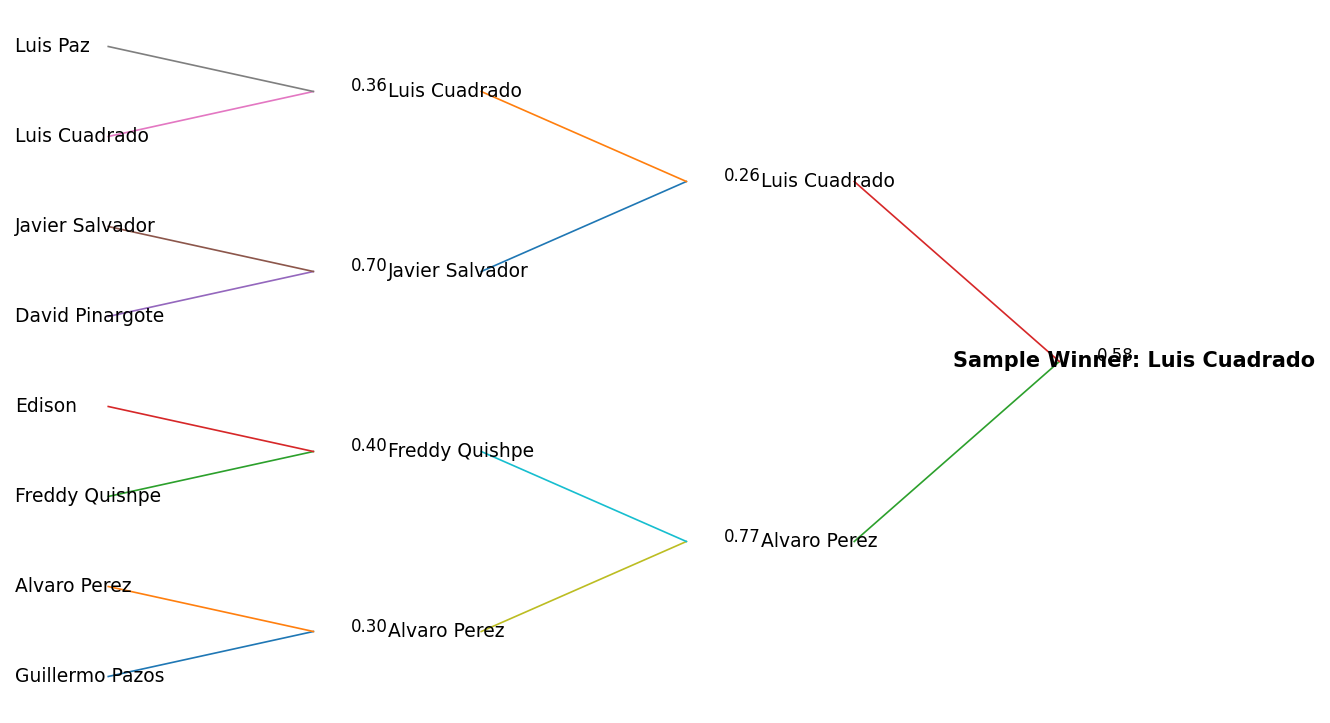

Foto URL: https://i.imgur.com/ehYATjO.jpeg


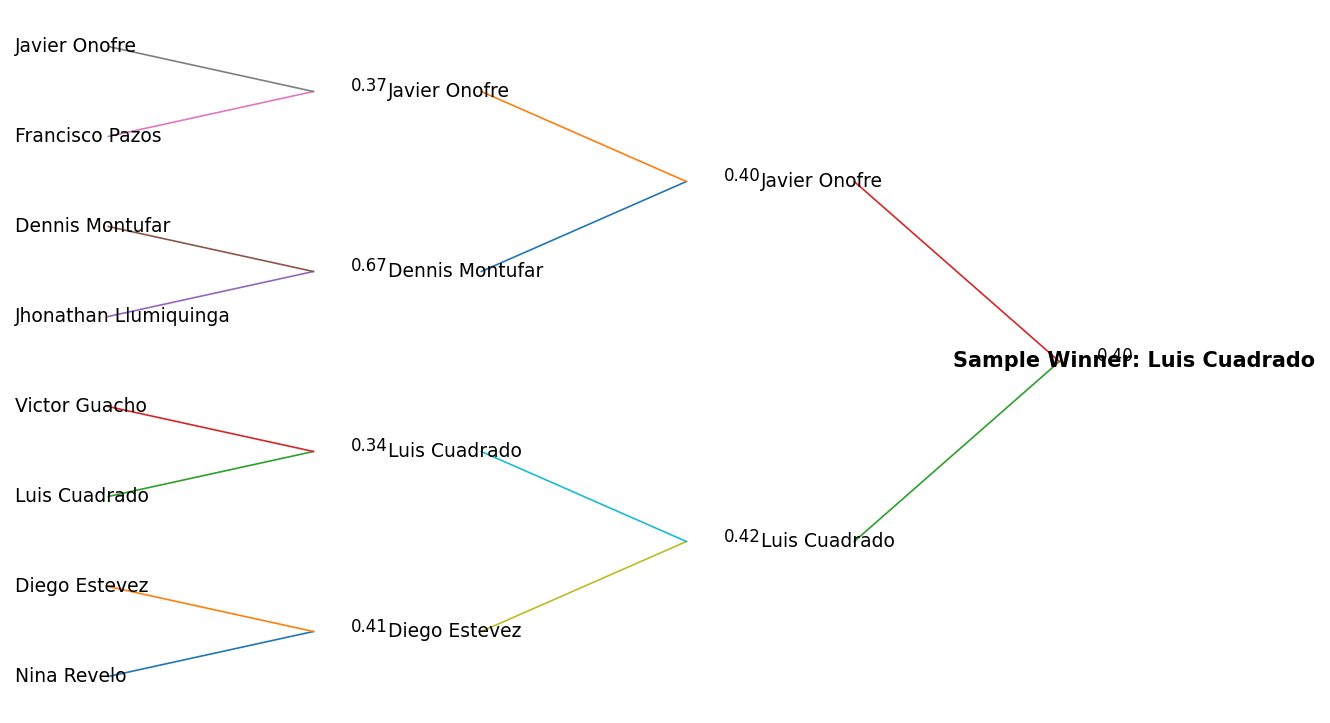

Foto URL: https://i.imgur.com/ZM889yo.jpeg


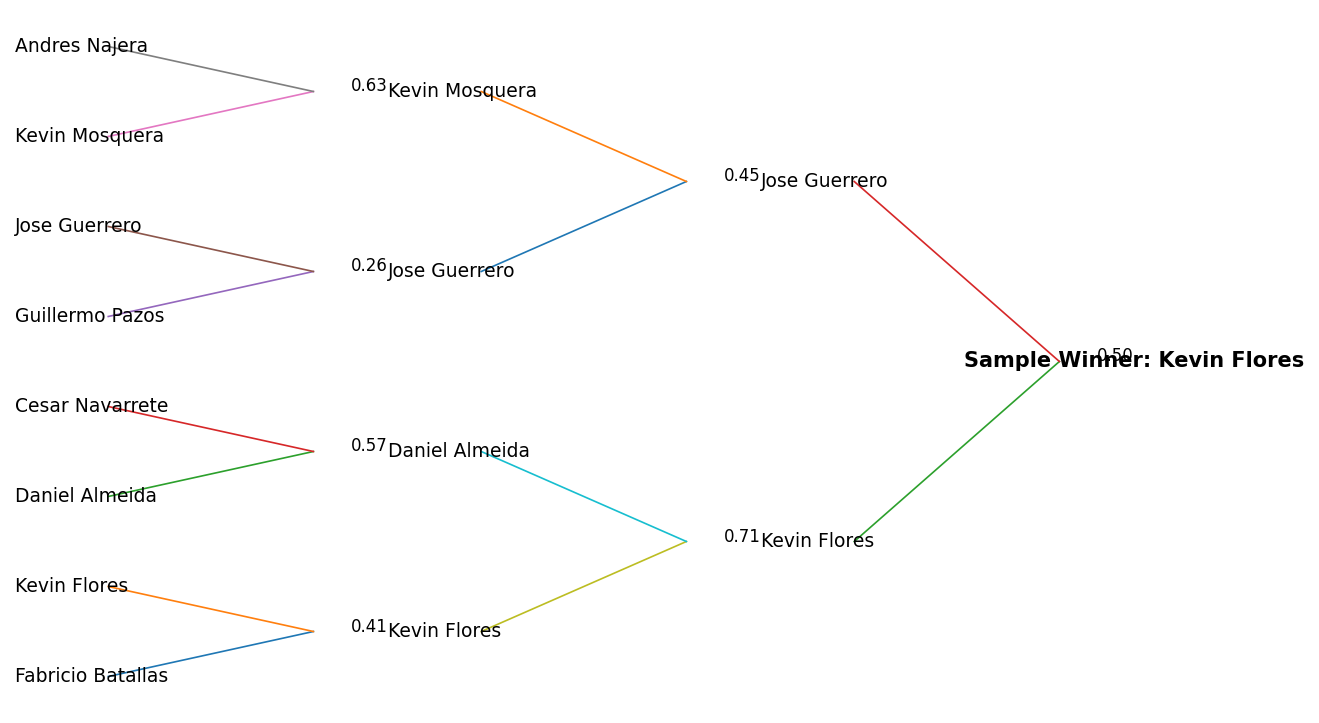

Foto URL: https://i.imgur.com/Dv7rAX5.jpeg


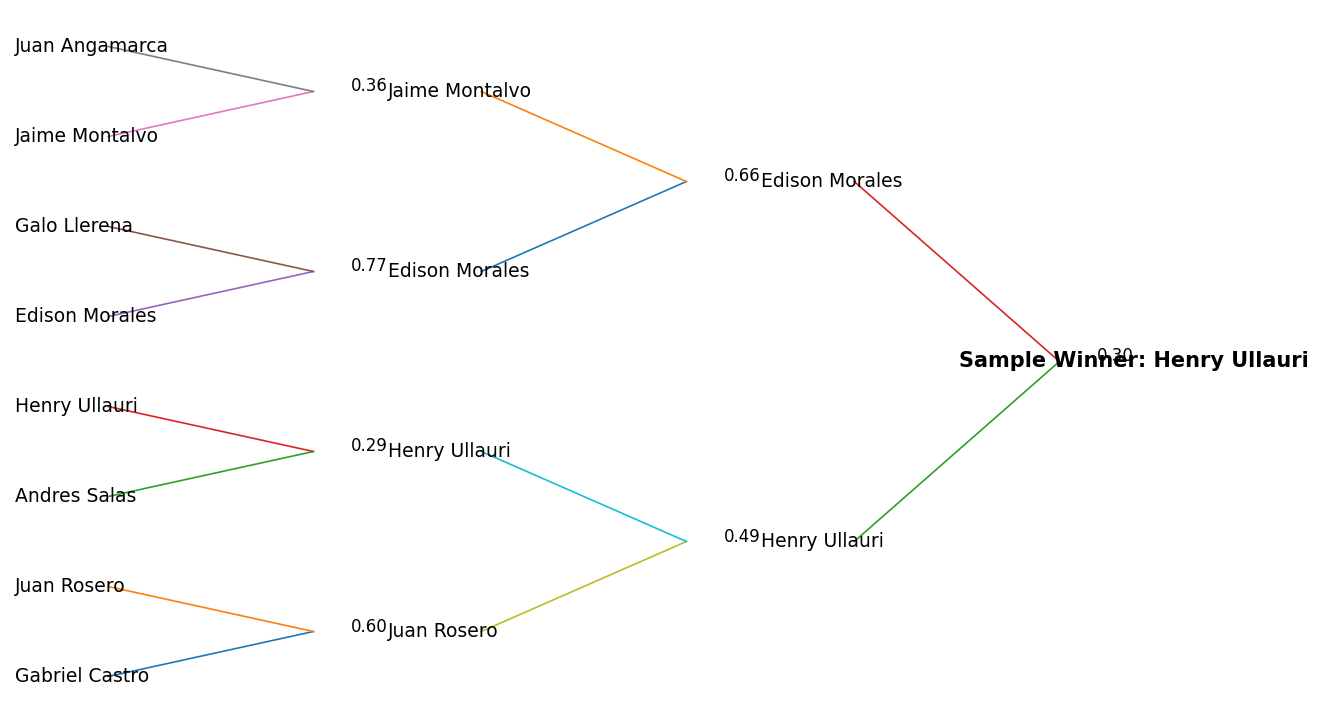

In [10]:
from IPython.display import Image, display

# Ruta de la imagen
registro2 = df[df["franquicia"] == top6_fran[0]].iloc[0]
url_franquicia = registro2["url_franquicia"]
print("Foto URL:", url_franquicia)
display(Image(url=url_franquicia,width=150))
ruta = "/mnt/data/brackets_franchises/bracket_DRAGON_BALL.png"
# Mostrar imagen
display(Image(filename=ruta))

registro2 = df[df["franquicia"] == top6_fran[1]].iloc[0]
url_franquicia = registro2["url_franquicia"]
print("Foto URL:", url_franquicia)
display(Image(url=url_franquicia,width=150))
# Ruta de la imagen
ruta = "/mnt/data/brackets_franchises/bracket_TEKKEN.png"
# Mostrar imagen
display(Image(filename=ruta))

registro2 = df[df["franquicia"] == top6_fran[2]].iloc[0]
url_franquicia = registro2["url_franquicia"]
print("Foto URL:", url_franquicia)
display(Image(url=url_franquicia,width=150))
# Ruta de la imagen
ruta = "/mnt/data/brackets_franchises/bracket_MORTAL_KOMBAT.png"
# Mostrar imagen
display(Image(filename=ruta))

registro2 = df[df["franquicia"] == top6_fran[3]].iloc[0]
url_franquicia = registro2["url_franquicia"]
print("Foto URL:", url_franquicia)
display(Image(url=url_franquicia,width=150))
# Ruta de la imagen
ruta = "/mnt/data/brackets_franchises/bracket_FIFA.png"
# Mostrar imagen
display(Image(filename=ruta))

registro2 = df[df["franquicia"] == top6_fran[4]].iloc[0]
url_franquicia = registro2["url_franquicia"]
print("Foto URL:", url_franquicia)
display(Image(url=url_franquicia,width=150))
# Ruta de la imagen
ruta = "/mnt/data/brackets_franchises/bracket_NARUTO.png"
# Mostrar imagen
display(Image(filename=ruta))

registro2 = df[df["franquicia"] == top6_fran[5]].iloc[0]
url_franquicia = registro2["url_franquicia"]
print("Foto URL:", url_franquicia)
display(Image(url=url_franquicia,width=150))
# Ruta de la imagen
ruta = "/mnt/data/brackets_franchises/bracket_MARIO_KART.png"
# Mostrar imagen
display(Image(filename=ruta))